# Intersection

In [ ]:
using Plots
using Revise

In [ ]:
using PolygonAlgorithms
using PolygonAlgorithms: x_coords, y_coords, translate

[ Info: Precompiling PolygonAlgorithms [32a0d02f-32d9-4438-b5ed-3a2932b48f96]


In [ ]:
using PolygonAlgorithms: PointInfo, Node, DoublyLinkedList, generate_list, find_and_insert_intersections!

## Segments

In [ ]:
seg1 = ((1.0, 1.0), (2.0, 3.0));
seg2 = ((2.0, 2.0), (5.0, 0.0));

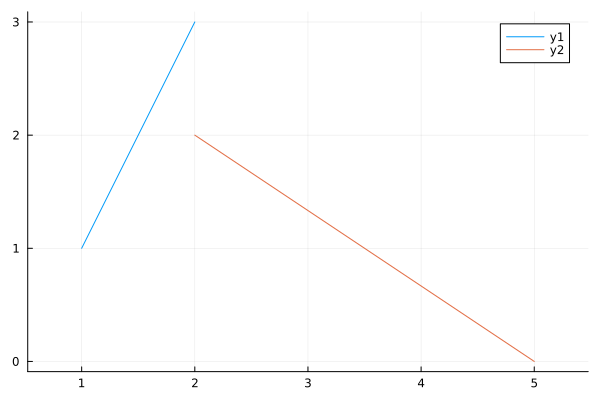

In [ ]:
point = intersect_geometry(seg1, seg2)

plot([seg1[1][1], seg1[2][1]], [seg1[1][2], seg1[2][2]], aspectratio=:equal)
plot!([seg2[1][1], seg2[2][1]], [seg2[1][2], seg2[2][2]])
if !isnothing(point)
    scatter!([point[1]], [point[2]])
end
plot!()

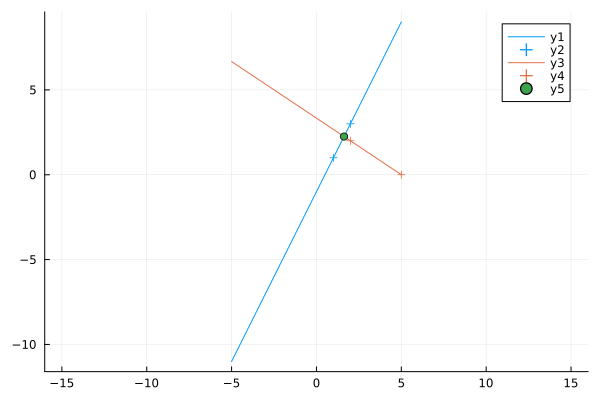

In [ ]:
line1 = PolygonAlgorithms.line_from_segment(seg1)
line2 = PolygonAlgorithms.line_from_segment(seg2)
point = intersect_geometry(line1, line2)

colors = get_color_palette(:auto, 3)

x = -5:1:5
plot(x, (line1[3] .- line1[1] .* x) / line1[2], colour=colors[1], aspectratio=:equal)
scatter!([seg1[1][1], seg1[2][1]], [seg1[1][2], seg1[2][2]], color=colors[1], marker=:cross)
plot!(x, (line2[3] .- line2[1] .* x) / line2[2], color=colors[2])
scatter!([seg2[1][1], seg2[2][1]], [seg2[1][2], seg2[2][2]], color=colors[2], marker=:cross)
if !isnothing(point)
    scatter!([point[1]], [point[2]], color=colors[3])
end
plot!()

## Convex Polygons

In [ ]:
## star of david
h = sqrt(3)
poly1 = PolygonAlgorithms.translate([
        (-1.0, 0.0), (0.0, h), (1.0, 0.0)
        ], (0.0, -h/3)
)
poly2 = PolygonAlgorithms.translate([
    (-1.0, 0.0), (0.0, -h), (1.0, 0.0)
    ], (0.0, h/3)
)
;

## random convex
t1 = 2π * rand(5)
t2 = 2π * rand(15)
a1, b1 = 2.0, 2.0
a2, b2 = 3.0, 1.0
poly1 = PolygonAlgorithms.sort_clockwise([(a1 * cos(t), b1 * sin(t)) for t in t1]);
poly2 = PolygonAlgorithms.sort_clockwise([(a2 * cos(t), b2 * sin(t)) for t in t2]);

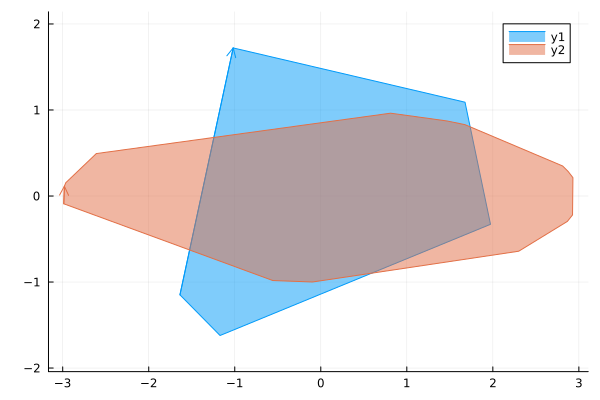

In [ ]:
idxs1 = vcat(1:length(poly1), 1)
idxs2 = vcat(1:length(poly2), 1)
plot(x_coords(poly1[idxs1]), y_coords(poly1[idxs1]), aspectratio=:equal, fill=(0, 0.5), arrow=true)
plot!(x_coords(poly2[idxs2]), y_coords(poly2[idxs2]), fill=(0, 0.5), arrow=true)

In [ ]:
points = PolygonAlgorithms.intersect_convex(poly1, poly2, PolygonAlgorithms.ChasingEdgesAlg());

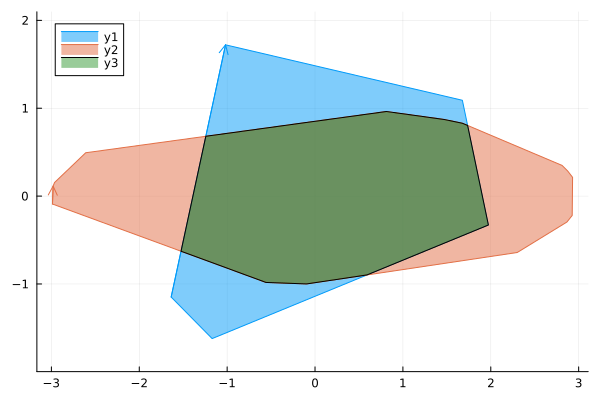

In [ ]:
if !isempty(points)
    #scatter!(x_coords(points), y_coords(points), color=:black, marker=:xcross)
    idxs = vcat(1:length(points), 1)
    plot!(x_coords(points[idxs]), y_coords(points[idxs]), fill=(0, 0.4, :green), color=:black)
end

In [ ]:
@time PolygonAlgorithms.intersect_convex(poly1, poly2, PolygonAlgorithms.ChasingEdgesAlg());
@time PolygonAlgorithms.intersect_convex(poly1, poly2, PolygonAlgorithms.PointSearchAlg());
@time PolygonAlgorithms.intersect_convex(poly1, poly2, PolygonAlgorithms.WeilerAthertonAlg());

  0.000013 seconds (3 allocations: 880 bytes)
  0.232544 seconds (368.92 k allocations: 18.541 MiB, 99.97% compilation time)
  1.030089 seconds (2.28 M allocations: 116.870 MiB, 4.72% gc time, 99.96% compilation time)


## Concave Polygons

In [ ]:
# spiral
θs = 0.0:0.01:6π
rs = θs
poly1 = [(r * cos(θ), r * sin(θ)) for (r, θ) in zip(rs, θs)] 
poly1 = vcat(poly1, reverse([0.8 .* p for p in poly1]))

# star
poly2 = [
    (0.0, 18.0), (3.0, 5.0), (15.0, 5.0), (5.0, 0.0), (10.0, -12.0), (0.0, -2.0),
    (-10.0, -12.0), (-5.0, 0.0), (-15.0, 5.0), (-3.0, 5.0)
]
;
#poly1 = PolygonAlgorithms.rotate(poly2, π/1.0, (0.0, 0.0));
#poly1 = translate(poly1, (0.0, 0.0))

# Random
# poly1 = PolygonAlgorithms.sort_clockwise([(rand(), rand()) for i in 1:100])
# poly2 = PolygonAlgorithms.sort_clockwise([(0.3+rand(), rand()) for i in 1:40])
  
## Intersecting forks
# poly1 = [
#     (0.0, 0.0), (0.0, 8.0), (1.0, 8.0), (1.0, 1.0),
#     (2.0, 1.0), (2.0, 8.0), (3.0, 8.0), (3.0, 1.0),
#     (4.0, 1.0), (4.0, 8.0), (5.0, 8.0), (5.0, 0.0),
# ]
# poly2 = PolygonAlgorithms.rotate(poly1, π/2.0, (2.5, 4.0));
# θ2 = 2π * rand(150)
# a2, b2, o2 = 3.0, 3.7, (2.5, 4.0)
# poly2 = PolygonAlgorithms.sort_clockwise([(a2 * cos(t) + o2[1], b2 * sin(t) + o2[2]) for t in θ2]);

if is_counter_clockwise(poly1)
    poly1 = reverse(poly1)
end
if is_counter_clockwise(poly2)
    poly2 = reverse(poly2)
end
;

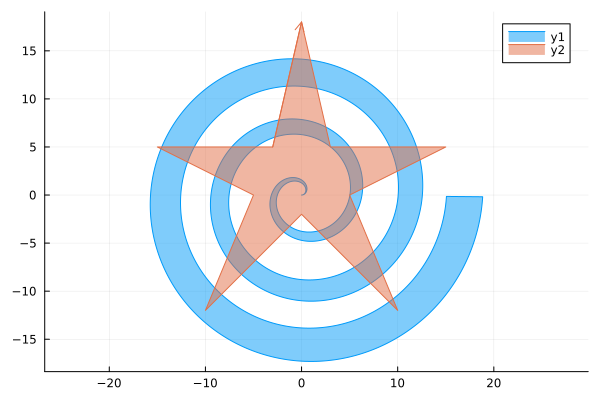

In [ ]:
idxs1 = vcat(1:length(poly1), 1)
idxs2 = vcat(1:length(poly2), 1)
plot(x_coords(poly1[idxs1]), y_coords(poly1[idxs1]), aspectratio=:equal, arrow=true, fill=(0, 0.5))
plot!(x_coords(poly2[idxs2]), y_coords(poly2[idxs2]), arrow=true, fill=(0, 0.5))

In [ ]:
regions = intersect_geometry(poly1, poly2);

In [ ]:
# list1 = generate_list(poly1)
# list2 = generate_list(poly2)
# # insert intersections
# find_and_insert_intersections!(list1, list2)

# display(list1)
# display(list2)

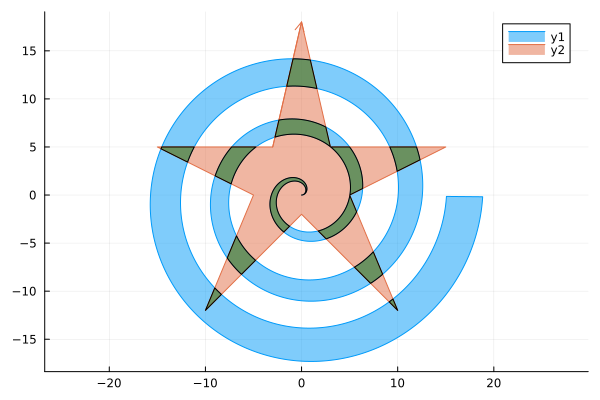

In [ ]:
for (i, region) in enumerate(regions)
    if length(region) == 1
        scatter!(x_coords(region), y_coords(region), color=:black, marker=:xcross, label="")
    else
        idxs = vcat(1:length(region), 1)
        plot!(x_coords(region[idxs]), y_coords(region[idxs]), fill=(0, 0.4, :green), label="", color=:black)
    end
end
plot!()